In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt


In [16]:
df = pd.read_csv('london.csv', parse_dates=['timestamp'])

# Описание данных:
timestamp – дата и время (точность до часа) \
cnt – количество аренд велосипедов за этот час \
t1 – температура, в С \
t2 – температура "ощущается как", в С  \
hum – влажность (%) \
wind_speed – скорость ветра, км/ч \
weather_code – погодные условия: \
1 – ясно (SKC) \
2 – преимущественно ясно / встречаются отдельные облака (SCT) \
3 – облачно / значительные облака (BKN) \
4 – пасмурно (OVC) \
7 – небольшой дождь Rain/ light Rain shower/ Light rain  \
10 – дождь с грозой \
26 – снегопад  \
94 – ледяной туман (да, такое бывает!) \
isholiday – является ли день праздником (1 – праздник, 0 – нет) \
isweekend –  является ли день выходным (1 – выходной, 0 – нет) \
season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

In [113]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,rolling,diff
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04,NaN,NaN
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04,NaN,NaN
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01-04,NaN,NaN
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01-04,NaN,NaN
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01-04,NaN,NaN


In [18]:
df.shape

(17414, 10)

In [19]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [20]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [21]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Посмотреть на число поездок по датам и времени. Постройте график, где: \
по оси x – дата (timestamp) \
по оси y – число поездок (cnt) \

In [23]:
df['date'] = df['timestamp'].dt.strftime('%Y-%m-%d')

In [26]:
df_by_date = df.groupby('date', as_index=False).cnt.sum()

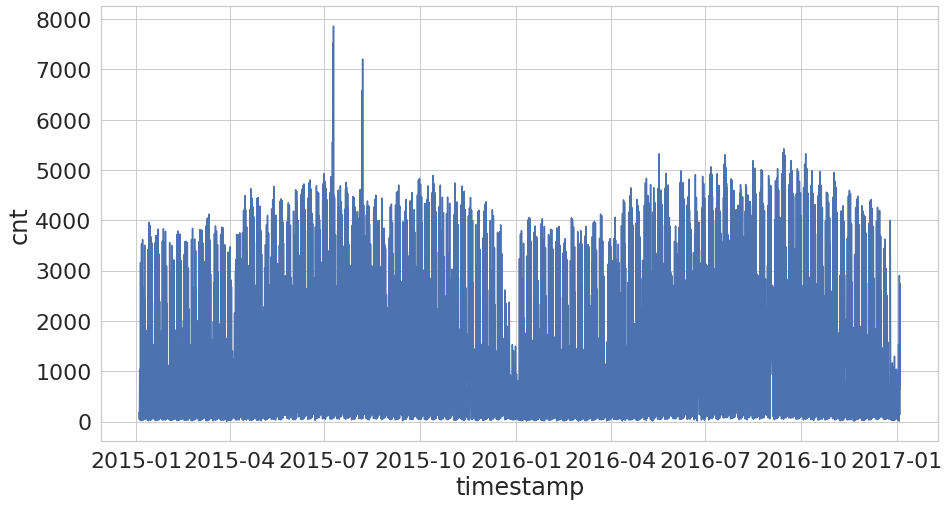

In [37]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.lineplot(x=df['timestamp'], y=df['cnt'])

In [79]:
df_by_day = df.sort_values('timestamp').set_index('timestamp').resample(rule='D').agg({'cnt':'sum'})

In [140]:
df.sort_values('timestamp').set_index('timestamp').resample(rule='D') \
                           .agg({'cnt':'sum', 't1':'mean', 't2':'mean'}) \
                           .rolling(window=3).mean()

,cnt,t1,t2
timestamp,,,
2015-01-04,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN
2015-01-06,16739.666667,6.125000,4.229167
2015-01-07,20683.000000,7.784118,5.513889
2015-01-08,19092.666667,8.353563,5.875000
...,...,...,...
2016-12-30,12682.000000,3.069444,1.173611
2016-12-31,12347.333333,4.826389,2.847222
2017-01-01,9803.666667,5.902778,3.513889


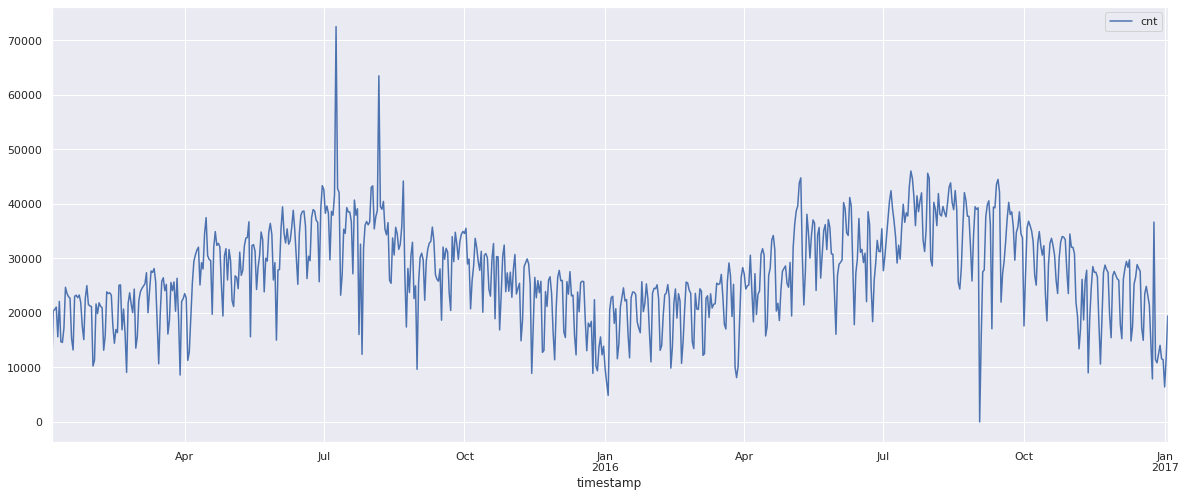

In [80]:
df_by_day.plot()

In [84]:
df_by_day['rolling'] = df_by_day.rolling(window=3).mean()
df_by_day = df_by_day.reset_index()

In [86]:
df_by_day.query('timestamp == "2015-07-09"')

,timestamp,cnt,rolling
186,2015-07-09,72504,50705.0


In [95]:
df_by_day['diff'] = df_by_day['rolling'] - df_by_day['cnt']
std = np.std(df_by_day['diff'])

In [107]:
df_by_day['upper_bound'] = df_by_day['rolling'] + std * 2.576 

In [108]:
df_by_day['lower_bound'] = df_by_day['rolling'] - std * 2.576 

In [109]:
df_by_day

,timestamp,cnt,rolling,diff,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN,NaN,NaN
1,2015-01-05,20372,NaN,NaN,NaN,NaN
2,2015-01-06,20613,16739.666667,-3873.333333,28482.585854,4996.747479
3,2015-01-07,21064,20683.000000,-381.000000,32425.919188,8940.080812
4,2015-01-08,15601,19092.666667,3491.666667,30835.585854,7349.747479
...,...,...,...,...,...,...
726,2016-12-30,11566,12682.000000,1116.000000,24424.919188,939.080812
727,2016-12-31,11424,12347.333333,923.333333,24090.252521,604.414146
728,2017-01-01,6421,9803.666667,3382.666667,21546.585854,-1939.252521
729,2017-01-02,11823,9889.333333,-1933.666667,21632.252521,-1853.585854


In [110]:
df_by_day.sort_values('timestamp', ascending=False).head(1).upper_bound.round(2)

730    24302.92
Name: upper_bound, dtype: float64

In [111]:
df_by_day.query('cnt > upper_bound')

,timestamp,cnt,rolling,diff,upper_bound,lower_bound
186,2015-07-09,72504,50705.000000,-21799.000000,62447.919188,38962.080812
214,2015-08-06,63468,46627.333333,-16840.666667,58370.252521,34884.414146
609,2016-09-04,27512,14259.000000,-13253.000000,26001.919188,2516.080812
721,2016-12-25,36653,19650.666667,-17002.333333,31393.585854,7907.747479


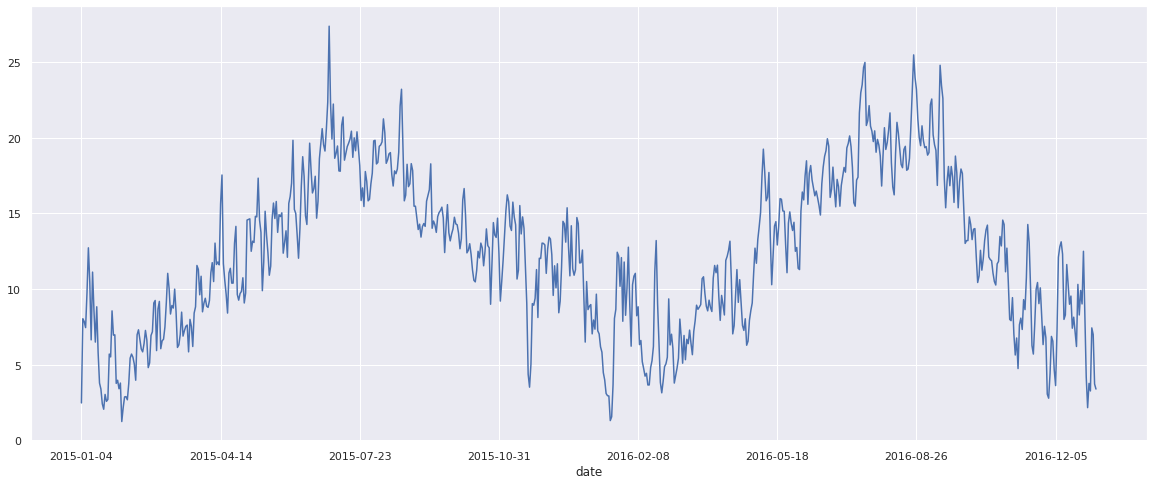

In [133]:
df.groupby('date').t1.mean().plot()

In [132]:
df.query('date == "2015-07-09"')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,rolling,diff
4453,2015-07-09 00:00:00,400,16.0,16.0,55.0,14.0,1.0,0.0,0.0,1.0,2015-07-09,NaN,NaN
4454,2015-07-09 01:00:00,212,15.5,15.5,59.0,14.0,1.0,0.0,0.0,1.0,2015-07-09,NaN,NaN
4455,2015-07-09 02:00:00,111,14.0,14.0,67.0,15.0,1.0,0.0,0.0,1.0,2015-07-09,NaN,NaN
4456,2015-07-09 03:00:00,81,14.0,14.0,63.0,18.5,1.0,0.0,0.0,1.0,2015-07-09,NaN,NaN
4457,2015-07-09 04:00:00,76,14.0,14.0,63.0,18.0,1.0,0.0,0.0,1.0,2015-07-09,NaN,NaN
4458,2015-07-09 05:00:00,269,13.0,13.0,67.0,17.0,1.0,0.0,0.0,1.0,2015-07-09,NaN,NaN
4459,2015-07-09 06:00:00,1724,13.0,13.0,67.0,16.0,1.0,0.0,0.0,1.0,2015-07-09,NaN,NaN
4460,2015-07-09 07:00:00,5309,13.5,13.5,65.0,17.0,1.0,0.0,0.0,1.0,2015-07-09,NaN,NaN
4461,2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2.0,0.0,0.0,1.0,2015-07-09,NaN,NaN
4462,2015-07-09 09:00:00,4832,15.0,15.0,59.0,16.0,2.0,0.0,0.0,1.0,2015-07-09,NaN,NaN


In [134]:
df_by_day.query('cnt < lower_bound')

,timestamp,cnt,rolling,diff,upper_bound,lower_bound
130,2015-05-14,15609,28709.333333,13100.333333,40452.252521,16966.414146
189,2015-07-12,23240,36036.666667,12796.666667,47779.585854,24293.747479
201,2015-07-24,16034,31013.666667,14979.666667,42756.585854,19270.747479
232,2015-08-24,17400,29529.333333,12129.333333,41272.252521,17786.414146
314,2015-11-14,8898,21037.333333,12139.333333,32780.252521,9294.414146
607,2016-09-02,0,26086.333333,26086.333333,37829.252521,14343.414146
615,2016-09-10,17080,31262.000000,14182.000000,43004.919188,19519.080812
621,2016-09-16,21967,36193.333333,14226.333333,47936.252521,24450.414146
678,2016-11-12,8990,20878.000000,11888.000000,32620.919188,9135.080812


In [135]:
df.query('date == "2016-09-02"')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,rolling,diff


In [3]:
se = 9 / np.sqrt(114)

In [4]:
m = 115

In [5]:
m + se * 1.96

116.6521373716301

In [6]:
m + se - 1.96

113.88292723042353

In [7]:
z = (118 - 114) / se

In [8]:
z

4.745368112013916